In [1]:
!pip install spotipy

import pandas as pd
import numpy as np
import requests
import json
import spotipy
from pprint import pprint
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
test_df = pd.read_csv("Final_2019_Chart.csv")
test_df.head()

,2019_bb_rank,2019_rev_rank,artist_name
0,1,100,Post Malone
1,2,99,Ariana Grande
2,3,98,Billie Eilish
3,4,97,Khalid
4,5,96,Drake


In [3]:
test_df['name2'] = ""
test_df['genres'] = ""
test_df['popularity'] = ""
test_df['uri_spotify'] = ""
test_df['followers'] = ""

test_df.head()

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,100,Post Malone,,,,,
1,2,99,Ariana Grande,,,,,
2,3,98,Billie Eilish,,,,,
3,4,97,Khalid,,,,,
4,5,96,Drake,,,,,


In [4]:
user_id= '72c82b45eef743cb8a144c07882d9689'
token= '0b3a9740301246d790f7f91895124b38'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(user_id,token))

In [5]:
params= {
    "name2": "name", 
    "popularity": "popularity",
    "genres": "genres",
    "uri_spotify": "uri",
    "followers": "followers"
}

In [6]:
for index, row in test_df[:101].iterrows():

    # get artist_name from df
    person = row['artist_name']

    # add keyword to params dict
    params['keyword'] = person

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {person}.")
    results = spotify.search(q=f'artist: {person}', type='artist')
    
    artist_data = results['artists']['items']
    
    try:
        #print(f"Artist {person} is in dataset")
        #print(f"Trying to get name")
        test_df.loc[index, 'name2'] = artist_data[0]['name']
        #print(f"Trying to get popularity")
        test_df.loc[index, 'popularity'] = artist_data[0]['popularity']
        #print(f"Trying to get genres")
        #print(artist_data[0]['genres'])
        #print(type(artist_data[0]['genres']))
        test_df.loc[index, 'genres'] = str(artist_data[0]['genres'])
        test_df.loc[index, 'uri_spotify'] = str(artist_data[0]['uri'])
        test_df.loc[index, 'followers'] = str(artist_data[0]['followers']['total'])
    except Exception as e:
        print(e)

Retrieving Results for Index 0: Post Malone.
Retrieving Results for Index 1: Ariana Grande.
Retrieving Results for Index 2: Billie Eilish.
Retrieving Results for Index 3: Khalid.
Retrieving Results for Index 4: Drake.
Retrieving Results for Index 5: Travis Scott.
Retrieving Results for Index 6: Ed Sheeran.
Retrieving Results for Index 7: Taylor Swift.
Retrieving Results for Index 8: Lil Nas X.
Retrieving Results for Index 9: Halsey.
Retrieving Results for Index 10: Jonas Brothers.
Retrieving Results for Index 11: Juice WRLD.
Retrieving Results for Index 12: Cardi B.
Retrieving Results for Index 13: DaBaby.
Retrieving Results for Index 14: BTS.
Retrieving Results for Index 15: Panic! At The Disco.
Retrieving Results for Index 16: Luke Combs.
Retrieving Results for Index 17: Lil Baby.
Retrieving Results for Index 18: Shawn Mendes.
Retrieving Results for Index 19: Lizzo.
Retrieving Results for Index 20: Meek Mill.
Retrieving Results for Index 21: Queen.
Retrieving Results for Index 22: Da

In [7]:
## New dataset matching top BB artists with Spotify API data

test_df.loc[test_df['name2'] != '']


,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,100,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29193948
1,2,99,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52615963
2,3,98,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34747517
3,4,97,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12837593
4,5,96,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50614759
...,...,...,...,...,...,...,...,...
95,96,5,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5470511
96,97,4,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25592370
97,98,3,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2747448
98,99,2,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653702


In [8]:
## Check Variable Types
test_df.dtypes

2019_bb_rank      int64
2019_rev_rank     int64
artist_name      object
name2            object
genres           object
popularity       object
uri_spotify      object
followers        object
dtype: object

In [9]:
test_df["popularity"]=test_df["popularity"].astype(int)
test_df["followers"]=test_df["followers"].astype(int)

The correlation between both factors is 0.47


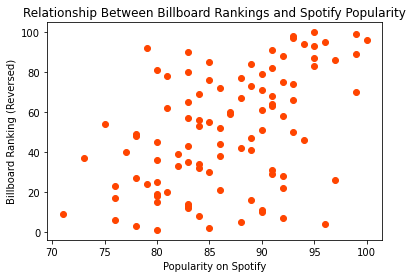

In [10]:
Popularity = test_df.iloc[:,5]
Billboard_Ranking = test_df.iloc[:,1]
correlation = st.pearsonr(Popularity,Billboard_Ranking)
plt.scatter(Popularity,Billboard_Ranking,facecolors = 'orangered')
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking (Reversed)')
plt.title('Relationship Between Billboard Rankings and Spotify Popularity')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Popularity_Scatter.png')
plt.show()



The correlation between both factors is 0.43


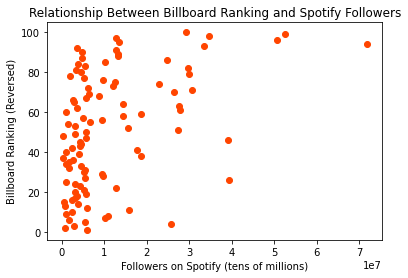

In [11]:
Followers = test_df.iloc[:,7]
Billboard_Ranking = test_df.iloc[:,1]
correlation = st.pearsonr(Followers,Billboard_Ranking)
plt.scatter(Followers,Billboard_Ranking,facecolors = 'orangered')
plt.xlabel('Followers on Spotify (tens of millions)')
plt.ylabel('Billboard Ranking (Reversed)')
plt.xticks(np.arange(0,72000000,10000000))
plt.title('Relationship Between Billboard Ranking and Spotify Followers')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Followers_Scatter.png')
plt.show()


In [12]:
## Understanding variety in genres category
test_df.genres.value_counts()

['atl hip hop', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']      2
['dance pop', 'pop', 'post-teen pop']                                         2
['melodic rap', 'pop rap', 'rap', 'trap']                                     2
['contemporary country', 'country', 'country road']                           2
['contemporary country', 'country', 'country road', 'modern country rock']    2
                                                                             ..
['canadian pop', 'pop', 'post-teen pop']                                      1
['atl hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']                 1
['metropopolis', 'modern rock', 'pop', 'pop rock']                            1
['contemporary country', 'texas country']                                     1
['alternative r&b', 'pop']                                                    1
Name: genres, Length: 90, dtype: int64

In [13]:
## Even though there is 1-100 rank on BB charts, these artists have similar rankings in Spotify Popularity
test_df.popularity.value_counts()

83     9
80     8
91     7
92     6
90     6
84     6
86     5
85     5
93     5
89     5
78     4
95     4
88     4
81     3
76     3
99     3
82     2
94     2
96     2
79     2
97     2
87     2
75     1
73     1
100    1
77     1
71     1
Name: popularity, dtype: int64

In [14]:
## Mean popularity of 100 artists
pop_avg = test_df["popularity"].mean()
print(pop_avg)

86.63


In [15]:
## Median popularity of 100 artist
pop_med = test_df["popularity"].median()
print(pop_med)

86.0


In [16]:
## Mean followers of 100 artists
foll_avg = test_df["followers"].mean()
print(foll_avg)

11263100.82


In [17]:
## Median followers of 100 artist
foll_med = test_df["followers"].median()
print(foll_med)

5574735.5


In [18]:
## min and max popularity score across billboard top 100
pop_min = test_df["popularity"].min()
pop_max = test_df["popularity"].max()

print(pop_min)
print(pop_max)

71
100


In [19]:
## min and max followers across billboard top 100
foll_min = test_df["followers"].min()
foll_max = test_df["followers"].max()
total_foll = sum(test_df['followers'])

print(foll_min)
print(foll_max)
print(total_foll)

161857
71826891
1126310082


In [20]:
## Who are the Billboard top 10
top_10_df = test_df.loc[test_df["2019_bb_rank"] < 11, :]
top_10_df

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,100,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29193948
1,2,99,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52615963
2,3,98,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34747517
3,4,97,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12837593
4,5,96,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50614759
5,6,95,Travis Scott,Travis Scott,['rap'],96,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,13451955
6,7,94,Ed Sheeran,Ed Sheeran,"['pop', 'uk pop']",94,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,71826891
7,8,93,Taylor Swift,Taylor Swift,"['dance pop', 'pop', 'pop dance', 'post-teen p...",95,spotify:artist:06HL4z0CvFAxyc27GXpf02,33507751
8,9,92,Lil Nas X,Lil Nas X,"['country rap', 'lgbtq+ hip hop', 'pop rap']",79,spotify:artist:7jVv8c5Fj3E9VhNjxT4snq,3626847
9,10,91,Halsey,Halsey,"['dance pop', 'electropop', 'etherpop', 'indie...",91,spotify:artist:26VFTg2z8YR0cCuwLzESi2,12633144


In [21]:
## What is the min-max and median pop scores and followers stats for top 10 bb artists?
pop_min_10 = top_10_df["popularity"].min()
pop_max_10 = top_10_df["popularity"].max()

print(pop_min_10)
print(pop_max_10)


foll_min_10 = top_10_df["followers"].min()
foll_max_10 = top_10_df["followers"].max()
total_foll_10 = sum(top_10_df['followers'])

print(foll_min_10)
print(foll_max_10)
print(total_foll_10)

pop_med_top = top_10_df["popularity"].median()
print(pop_med_top)

foll_med_top = top_10_df["followers"].median()
print(foll_med_top)

79
100
3626847
71826891
315056368
94.5
31350849.5


In [22]:
## Who are the Billboard Bottom 10
bottom_10_df = test_df.loc[test_df["2019_bb_rank"] > 89, :]
bottom_10_df

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
89,90,11,Kendrick Lamar,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",90,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,15777432
90,91,10,Polo G,Polo G,['chicago rap'],90,spotify:artist:6AgTAQt8XS6jRWi4sX7w49,2390158
91,92,9,Sheck Wes,Sheck Wes,"['rap', 'trap', 'underground hip hop', 'vapor ...",71,spotify:artist:2RDOrhPqAM4jzTRCEb19qX,981807
92,93,8,Migos,Migos,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",84,spotify:artist:6oMuImdp5ZcFhWP0ESe6mG,10922898
93,94,7,Lil Uzi Vert,Lil Uzi Vert,"['melodic rap', 'philly rap', 'rap', 'trap']",92,spotify:artist:4O15NlyKLIASxsJ0PrXPfz,10073409
94,95,6,Nipsey Hussle,Nipsey Hussle,"['conscious hip hop', 'gangster rap', 'hip hop...",76,spotify:artist:0EeQBlQJFiAfJeVN2vT9s0,1752199
95,96,5,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5470511
96,97,4,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25592370
97,98,3,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2747448
98,99,2,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653702


In [23]:
## What is the min-max and median pop scores and followers stats for bottom 10 bb artists?
pop_min_90 = bottom_10_df["popularity"].min()
pop_max_90 = bottom_10_df["popularity"].max()

print(pop_min_90)
print(pop_max_90)


foll_min_90 = bottom_10_df["followers"].min()
foll_max_90 = bottom_10_df["followers"].max()
total_foll_90 = sum(bottom_10_df['followers'])

print(foll_min_90)
print(foll_max_90)
print(total_foll_90)


pop_med_bottom = bottom_10_df["popularity"].median()
print(pop_med_bottom)

foll_med_bottom = bottom_10_df["followers"].median()
print(foll_med_bottom)

71
96
653702
25592370
82187700
85.0
5470511.0


In [24]:
## Top artists in terms of Spotify Pop
pop_sort_df = test_df.sort_values("popularity", ascending=False)
pop_sort_df.head(10)

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
4,5,96,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50614759
1,2,99,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52615963
11,12,89,Juice WRLD,Juice WRLD,"['chicago rap', 'melodic rap']",99,spotify:artist:4MCBfE4596Uoi2O4DtmEMz,13289059
30,31,70,Bad Bunny,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",99,spotify:artist:4q3ewBCX7sLwd24euuV69X,26304326
74,75,26,Justin Bieber,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",97,spotify:artist:1uNFoZAHBGtllmzznpCI3s,39243842
14,15,86,BTS,BTS,"['k-pop', 'k-pop boy group']",97,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,24792244
96,97,4,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25592370
5,6,95,Travis Scott,Travis Scott,['rap'],96,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,13451955
0,1,100,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29193948
17,18,83,Lil Baby,Lil Baby,"['atl hip hop', 'atl trap', 'rap']",95,spotify:artist:5f7VJjfbwm532GiveGC0ZK,5379850


In [25]:
## Top artists in terms of Spotify Followers
foll_sort_df = test_df.sort_values("followers", ascending=False)
foll_sort_df.head(10)

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
6,7,94,Ed Sheeran,Ed Sheeran,"['pop', 'uk pop']",94,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,71826891
1,2,99,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52615963
4,5,96,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50614759
74,75,26,Justin Bieber,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",97,spotify:artist:1uNFoZAHBGtllmzznpCI3s,39243842
54,55,46,Eminem,Eminem,"['detroit hip hop', 'hip hop', 'rap']",94,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,39103323
2,3,98,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34747517
7,8,93,Taylor Swift,Taylor Swift,"['dance pop', 'pop', 'pop dance', 'post-teen p...",95,spotify:artist:06HL4z0CvFAxyc27GXpf02,33507751
29,30,71,Imagine Dragons,Imagine Dragons,"['modern rock', 'pop', 'rock']",90,spotify:artist:53XhwfbYqKCa1cC15pYq2q,30742078
21,22,79,Queen,Queen,"['classic rock', 'glam rock', 'rock']",90,spotify:artist:1dfeR4HaWDbWqFHLkxsg1d,29857910
18,19,82,Shawn Mendes,Shawn Mendes,"['canadian pop', 'dance pop', 'pop', 'post-tee...",91,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,29758478


In [26]:
## Bottom artists in terms of Spotify Pop
pop_sort_low_df = test_df.sort_values("popularity", ascending=True)
pop_sort_low_df.head(10)

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
91,92,9,Sheck Wes,Sheck Wes,"['rap', 'trap', 'underground hip hop', 'vapor ...",71,spotify:artist:2RDOrhPqAM4jzTRCEb19qX,981807
63,64,37,Billy Ray Cyrus,Billy Ray Cyrus,['country'],73,spotify:artist:60rpJ9SgigSd16DOAG7GSa,174282
46,47,54,Lauren Daigle,Lauren Daigle,"['ccm', 'christian alternative rock', 'christi...",75,spotify:artist:40LHVA5BTQp9RxHOQ9JPYj,1466073
77,78,23,Carrie Underwood,Carrie Underwood,"['contemporary country', 'country', 'country d...",76,spotify:artist:4xFUf1FHVy696Q1JQZMTRj,4224442
83,84,17,Paul McCartney,Paul McCartney,"['album rock', 'art rock', 'beatlesque', 'clas...",76,spotify:artist:4STHEaNw4mPZ2tzheohgXB,3210141
94,95,6,Nipsey Hussle,Nipsey Hussle,"['conscious hip hop', 'gangster rap', 'hip hop...",76,spotify:artist:0EeQBlQJFiAfJeVN2vT9s0,1752199
60,61,40,Normani,Normani,"['dance pop', 'pop', 'post-teen pop', 'r&b']",77,spotify:artist:2cWZOOzeOm4WmBJRnD5R7I,1016542
52,53,48,Bradley Cooper,Bradley Cooper,['hollywood'],78,spotify:artist:4VIvfOurcf0vuLRxLkGnIG,161857
51,52,49,Ella Mai,Ella Mai,"['dance pop', 'pop', 'pop r&b', 'pop rap', 'po...",78,spotify:artist:7HkdQ0gt53LP4zmHsL0nap,3145997
73,74,27,Blake Shelton,Blake Shelton,"['contemporary country', 'country', 'country r...",78,spotify:artist:1UTPBmNbXNTittyMJrNkvw,5384303


In [27]:
## Bottom artists in terms of Spotify Followers
foll_sort_low_df = test_df.sort_values("followers", ascending=True)
foll_sort_low_df.head(10)

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
52,53,48,Bradley Cooper,Bradley Cooper,['hollywood'],78,spotify:artist:4VIvfOurcf0vuLRxLkGnIG,161857
63,64,37,Billy Ray Cyrus,Billy Ray Cyrus,['country'],73,spotify:artist:60rpJ9SgigSd16DOAG7GSa,174282
85,86,15,Maren Morris,Maren Morris,"['contemporary country', 'texas country']",80,spotify:artist:6WY7D3jk8zTrHtmkqqo5GI,527355
98,99,2,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653702
87,88,13,Mustard,Mustard,"['cali rap', 'hip hop', 'pop rap', 'rap', 'sou...",83,spotify:artist:0YinUQ50QDB7ZxSCLyQ40k,766327
66,67,34,Morgan Wallen,Morgan Wallen,"['contemporary country', 'deep talent show']",84,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,955439
40,41,60,Swae Lee,Swae Lee,"['melodic rap', 'pop rap', 'rap', 'trap']",87,spotify:artist:1zNqQNIdeOUZHb8zbZRFMX,963323
91,92,9,Sheck Wes,Sheck Wes,"['rap', 'trap', 'underground hip hop', 'vapor ...",71,spotify:artist:2RDOrhPqAM4jzTRCEb19qX,981807
75,76,25,City Girls,City Girls,"['pop', 'scam rap', 'trap queen']",80,spotify:artist:37hAfseJWi0G3Scife12Il,994123
60,61,40,Normani,Normani,"['dance pop', 'pop', 'post-teen pop', 'r&b']",77,spotify:artist:2cWZOOzeOm4WmBJRnD5R7I,1016542


In [28]:
bins = [0, 19, 39, 59, 79, 100]

# Create labels for these bins
group_labels = ["1-20", "21-40", "41-60", "61-80", "81-100"]

pd.cut(test_df['2019_bb_rank'], bins, labels=group_labels).head()

test_df["Grouped BB Rank"] = pd.cut(test_df["2019_bb_rank"], bins, labels=group_labels)
test_df.head(100)

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers,Grouped BB Rank
0,1,100,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29193948,1-20
1,2,99,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52615963,1-20
2,3,98,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34747517,1-20
3,4,97,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12837593,1-20
4,5,96,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50614759,1-20
...,...,...,...,...,...,...,...,...,...
95,96,5,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5470511,81-100
96,97,4,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25592370,81-100
97,98,3,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2747448,81-100
98,99,2,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653702,81-100


In [29]:
BB_group = test_df.groupby("Grouped BB Rank")


# Get the average of each column within the GroupBy object
BB_group[["popularity", "followers"]].mean()

,popularity,followers
Grouped BB Rank,,
1-20,92.684211,2.235518e+07
21-40,87.900000,1.185378e+07
41-60,85.600000,9.958866e+06
61-80,84.050000,7.449854e+06
81-100,83.380952,5.538649e+06


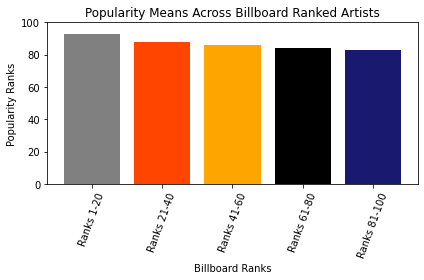

In [30]:
new_groups = ["Ranks 1-20", "Ranks 21-40", "Ranks 41-60", "Ranks 61-80", "Ranks 81-100"]
pop_groups = [93, 88, 86, 84, 83]
plt.bar(new_groups, pop_groups, color=['gray','orangered','orange', 'black', 'midnightblue'], align="center")
plt.title("Popularity Means Across Billboard Ranked Artists")
plt.xlabel("Billboard Ranks")
plt.ylabel("Popularity Ranks")
plt.ylim([0,100])
plt.xticks(rotation=70)
plt.tight_layout()

plt.savefig('Popularity_Billboard_Bar.png')


In [31]:
test_df = test_df.rename(columns={'2019_bb_rank': '2019 Year-End Billboard Rank','2019_rev_rank':'2019 Year-End Billboard Rank (Reverse)','artist_name':'Artist Name', 'genres':'Genres','popularity': 'Spotify Popularity', 'followers':'Followers'})
test_df.head()
test_df = test_df.drop(columns=['name2','uri_spotify'])
test_df.head()

,2019 Year-End Billboard Rank,2019 Year-End Billboard Rank (Reverse),Artist Name,Genres,Spotify Popularity,Followers,Grouped BB Rank
0,1,100,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,29193948,1-20
1,2,99,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,52615963,1-20
2,3,98,Billie Eilish,"['electropop', 'pop']",93,34747517,1-20
3,4,97,Khalid,"['alternative r&b', 'pop']",93,12837593,1-20
4,5,96,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,50614759,1-20


In [32]:
bins = [0, 5000000, 10000000, 15000000, 20000000, 1000000000]
group_labels = ["<5 Million", "5 - 10 Million", "10 - 15 Million", "15 - 20 Million", ">20 Million"]

In [33]:
test_df["Grouped Followers"] = pd.cut(test_df["Followers"], bins, labels=group_labels)
test_df.head()

,2019 Year-End Billboard Rank,2019 Year-End Billboard Rank (Reverse),Artist Name,Genres,Spotify Popularity,Followers,Grouped BB Rank,Grouped Followers
0,1,100,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,29193948,1-20,>20 Million
1,2,99,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,52615963,1-20,>20 Million
2,3,98,Billie Eilish,"['electropop', 'pop']",93,34747517,1-20,>20 Million
3,4,97,Khalid,"['alternative r&b', 'pop']",93,12837593,1-20,10 - 15 Million
4,5,96,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,50614759,1-20,>20 Million


In [34]:
new_foll_group = test_df.groupby("Grouped Followers")


# Get the average of each column within the GroupBy object
new_foll_group[["Spotify Popularity", "2019 Year-End Billboard Rank"]].mean()

,Spotify Popularity,2019 Year-End Billboard Rank
Grouped Followers,,
<5 Million,81.883721,59.581395
5 - 10 Million,86.761905,57.047619
10 - 15 Million,91.384615,35.461538
15 - 20 Million,87.600000,60.800000
>20 Million,94.111111,29.166667


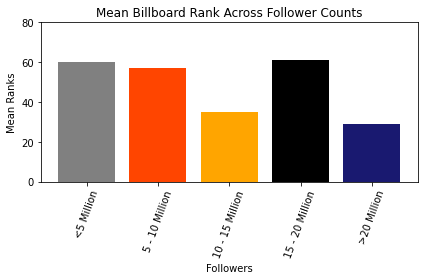

In [35]:
new_follower_charts = ["<5 Million", "5 - 10 Million", "10 - 15 Million", "15 - 20 Million", ">20 Million"]
year_end_chart = [60, 57, 35, 61, 29]
plt.bar(new_follower_charts, year_end_chart, color=['gray','orangered','orange', 'black', 'midnightblue'], align="center")
plt.title("Mean Billboard Rank Across Follower Counts")
plt.xlabel("Followers")
plt.ylabel("Mean Ranks")
plt.xticks(rotation=70)
plt.ylim([0, 80])
plt.tight_layout()

plt.savefig("Billboard_Followers_Bar.png")

In [36]:
import ast

all_genres = []

for index, artist in test_df.iterrows():
    
    genres = ast.literal_eval(artist['Genres'])
    
    for genre in genres:
        all_genres.append(genre)
        
all_genres

genre_series = pd.Series(all_genres)

genre_counts = genre_series.value_counts()

genre_counts.head(10)

pop                     35
rap                     32
pop rap                 20
trap                    20
dance pop               18
hip hop                 14
post-teen pop           14
contemporary country    13
melodic rap             11
rock                    10
dtype: int64

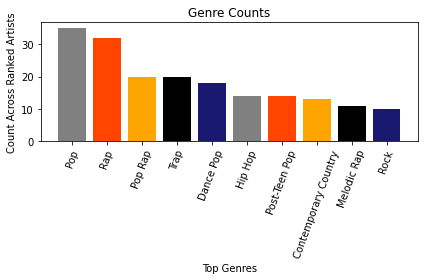

In [37]:
ten_genres = ["Pop", "Rap", "Pop Rap", "Trap", "Dance Pop", "Hip Hop", "Post-Teen Pop", "Contemporary Country", "Melodic Rap", "Rock"]
genre_numbers = [35, 32, 20, 20, 18, 14, 14, 13, 11, 10]
plt.bar(ten_genres, genre_numbers, color=['gray','orangered','orange', 'black', 'midnightblue'], align="center")
plt.title("Genre Counts")
plt.xlabel("Top Genres")
plt.ylabel("Count Across Ranked Artists")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("Genre_Count_Bar.png")